Se importan las librerías necesarias para realizar el manejo de los datos (i.e., numpy, pandas matplotlib. Se importan las librerías de sklearn tree, datasets y metrics para poder implementar un modelo de árbol de decisión, con el conjunto de datos de cáncer de seno. La librería que nos interesa en particular con este ejemplo es pickle, la cual se usa para serialización de objetos en python. De esta manera podemos guardar nuestro modelo en memoria secundaria y posteriormente poderlo cargar para continuar con nuestras labores.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree, datasets, metrics

Se carga el conjunto de datos de cáncer de seno y se obtiene en X las variables independientes (todas son numéricas (por consiguiente no se debe realizar ninguna conversión) y en y la variable dependiente.

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

Se divide el conjunto de datos para entrenamiento (70%) y para prueba (30%)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Se crea el modelo, con un criterio de particionamiento de impureza de gini, dos criterios de prepoda (máxima profundidad de 3 y menor cantidad de observaciones en una hoja de 5).

In [4]:
decision_tree_model = tree.DecisionTreeClassifier(criterion="gini", 
                                             random_state=100, 
                                             max_depth=3, 
                                             min_samples_leaf=5)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

Se crea el nombre del archivo a recoger el modelo entrenado y lo guardamos en una variable.
Abrimos el archivo con el nombre en modo escritura w y definimos que lo vamos a hacer de manera binaria. Guardamos el objeto archivo en decision_tree_model.pkl. Con la función dump de pickle guardamos en el archivo creado, los datos de nuestro objeto decision_tree_model creado con sklearn y los datos de entrenamiento.
Con close cerramos el archivo.

In [5]:
decision_tree_pkl_filename = 'decision_tree_classifier.pkl'
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(decision_tree_model, decision_tree_model_pkl)
decision_tree_model_pkl.close()

Realizamos las predicciones a partir de nuestro árbol de decisión ya entrenado utilizando nuestro conjunto de prueba.

In [6]:
y_pred = decision_tree_model.predict(X_test)

Creamos nuestra matriz de confusión a partir de las predicciones arrojadas por el modelo y los valores de verdad que obtuvimos cuando particionamos el conjunto de datos.

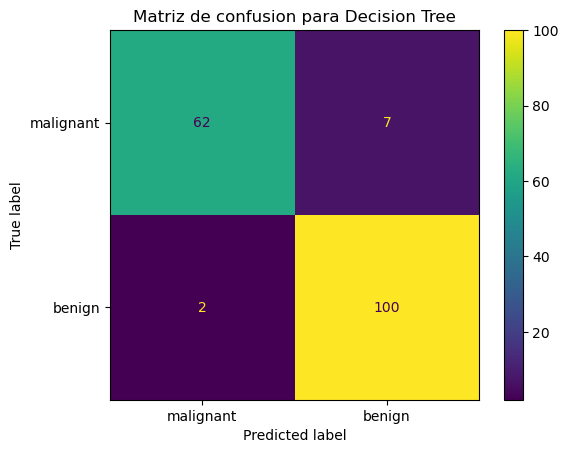

In [15]:
cm=metrics.confusion_matrix(y_test, y_pred,labels=decision_tree_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_)
disp.plot()
plt.title("Matriz de confusion para Decision Tree")
tick_marks = np.arange(2)
plt.xticks(tick_marks, cancer.target_names)
plt.yticks(tick_marks, cancer.target_names)
plt.show()

Impimimos la matriz de confusión como matriz y utilizando nuestras funciones propias de la librería de métricas de sklearn obtenemos, con relativa faciliadad, la exactitud (o correccitud / accuracy) del modelo y su kappa.

In [16]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

[[ 62   7]
 [  2 100]]
Exactitud:  0.9473684210526315
Kappa    :  0.8893681259434979


Haciendo uso de matplotlib.pyplot cambiamos el tamaño de la imagen y realizamos un gráfico del árbol resultante.

[Text(0.5416666666666666, 0.875, 'worst concave points <= 0.144\ngini = 0.46\nsamples = 398\nvalue = [143, 255]\nclass = benign'),
 Text(0.3333333333333333, 0.625, 'mean area <= 696.25\ngini = 0.155\nsamples = 271\nvalue = [23, 248]\nclass = benign'),
 Text(0.16666666666666666, 0.375, 'worst concave points <= 0.122\ngini = 0.055\nsamples = 249\nvalue = [7, 242]\nclass = benign'),
 Text(0.08333333333333333, 0.125, 'gini = 0.017\nsamples = 228\nvalue = [2, 226]\nclass = benign'),
 Text(0.25, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [5, 16]\nclass = benign'),
 Text(0.5, 0.375, 'mean texture <= 18.495\ngini = 0.397\nsamples = 22\nvalue = [16, 6]\nclass = malignant'),
 Text(0.4166666666666667, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = benign'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = malignant'),
 Text(0.75, 0.625, 'worst area <= 710.2\ngini = 0.104\nsamples = 127\nvalue = [120, 7]\nclass = malignant'),
 Text(0.666666666666666

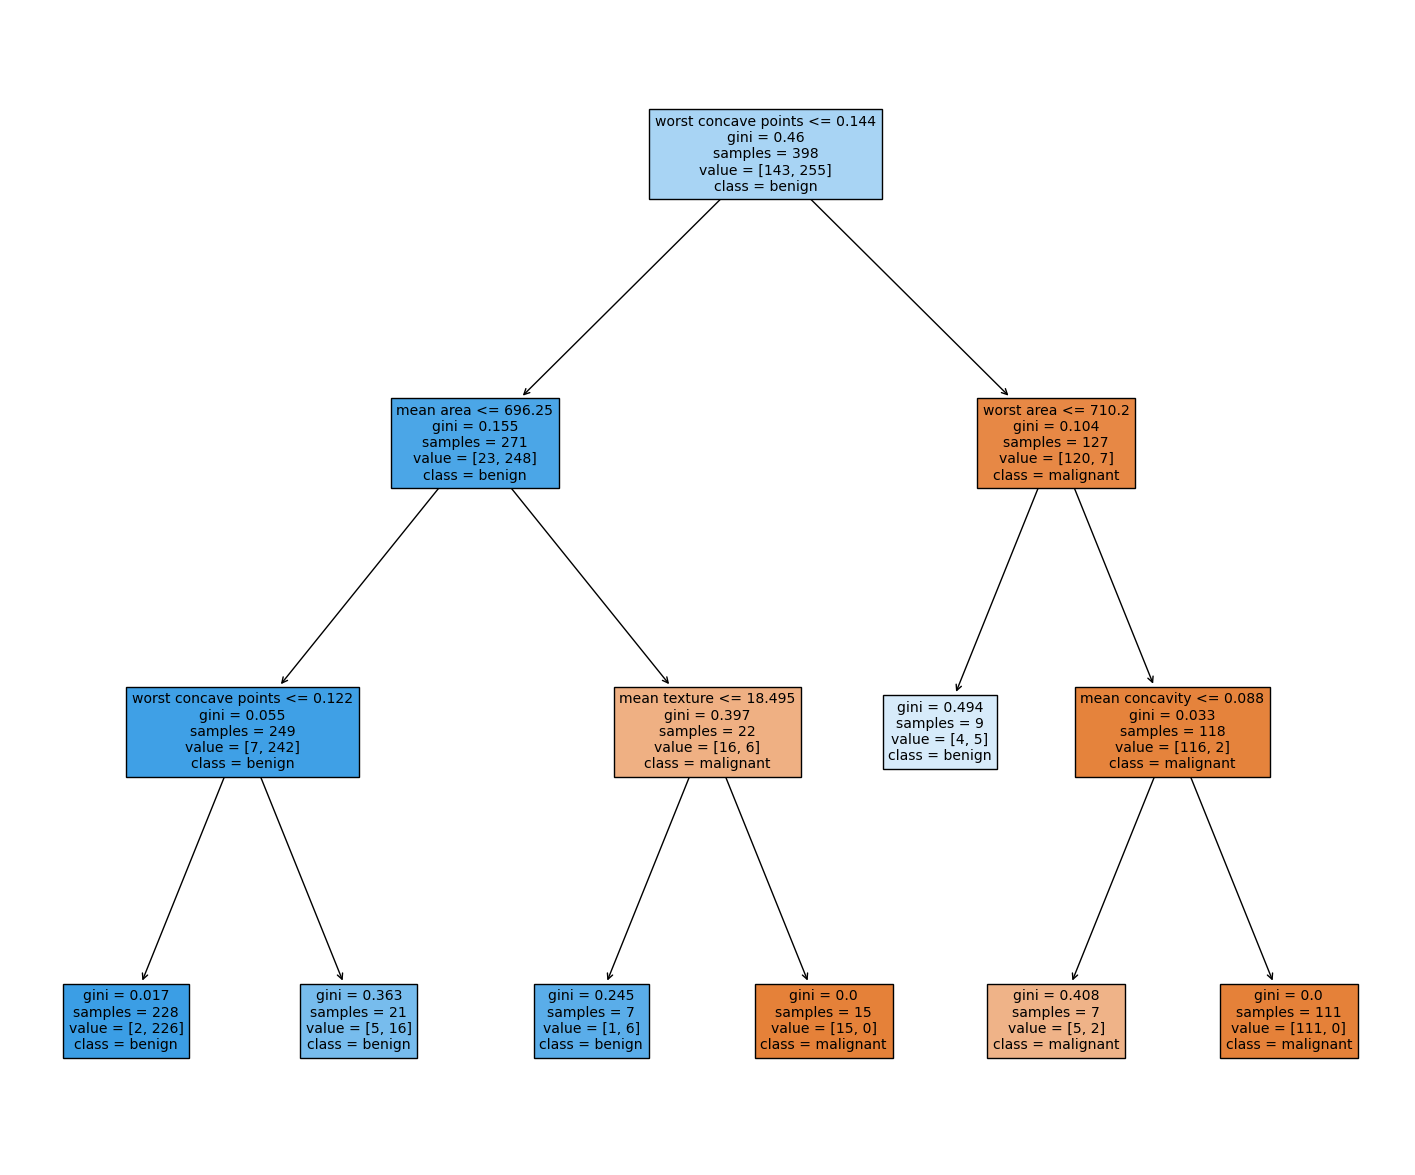

In [17]:
plt.figure(figsize=(18,15))
tree.plot_tree(decision_tree_model, 
               feature_names=cancer.feature_names, 
               class_names=cancer.target_names, 
               filled=True)

Ahora para verificar que sí guardamos nuestro modelo y podemos retomar nuestro proceso, abrimos el archivo utilizando su nombre, pero en este caso para lectura r y obviamente seguimos utilizando el modo binario con el que habíamos guardado.
En una nueva variable guardamos el modelo de-serializado a través del uso de la función de pickle load, que recibe el archivo en modo lectura y retorna el objeto del árbol de decisión.
Mostramos el árbol de decisión proveniente del archivo guardado y nos damos cuenta que es el mismo que ya habíamos creado y entrenado.

In [18]:
decision_tree_model_pkl_opened = open(decision_tree_pkl_filename, 'rb')
decision_tree_model_loaded = pickle.load(decision_tree_model_pkl_opened)
decision_tree_model_loaded

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

Para verificar que nuestros resultados son iguales a los que fueron arrojados previamente, volvemos a predecir con el objeto en donde cargamos los datos provenientes por el archivo.

In [19]:
y_pred1 = decision_tree_model.predict(X_test)

Creamos nuestra matriz de confusión a partir de los mismos datos además de los predichos por nuestro modelo cargado (y_pred1)

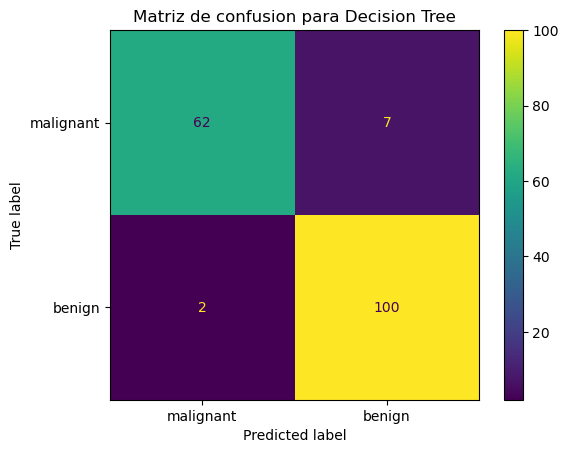

In [21]:
cm=metrics.confusion_matrix(y_test, y_pred1,labels=decision_tree_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_)
disp.plot()
plt.title("Matriz de confusion para Decision Tree")
tick_marks = np.arange(2)
plt.xticks(tick_marks, cancer.target_names)
plt.yticks(tick_marks, cancer.target_names)
plt.show()

Realizamos la misma labor con y_pred1 para verificar que la matriz de confusión, la exactitud y el kappa, son iguales a los originalmente calculados.

In [22]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred1))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred1))

[[ 62   7]
 [  2 100]]
Exactitud:  0.9473684210526315
Kappa    :  0.8893681259434979


# DBSCAN

Text(0, 0.5, 'Feature 1')

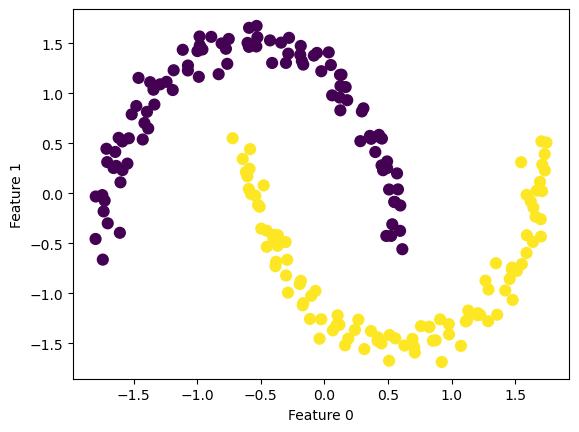

In [27]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/uramanibalsosa/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


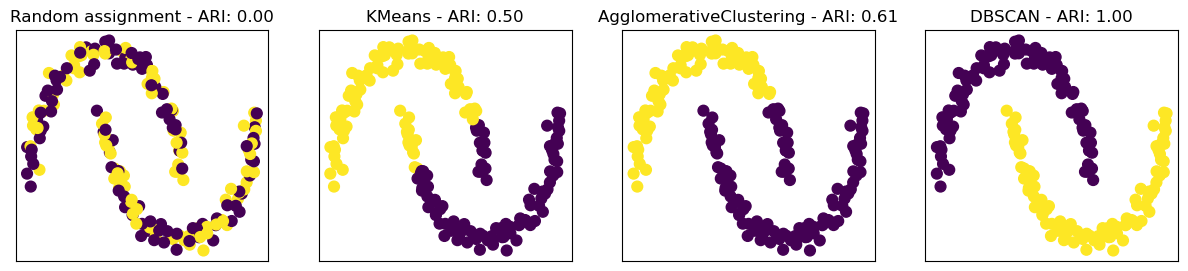

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

/Users/uramanibalsosa/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


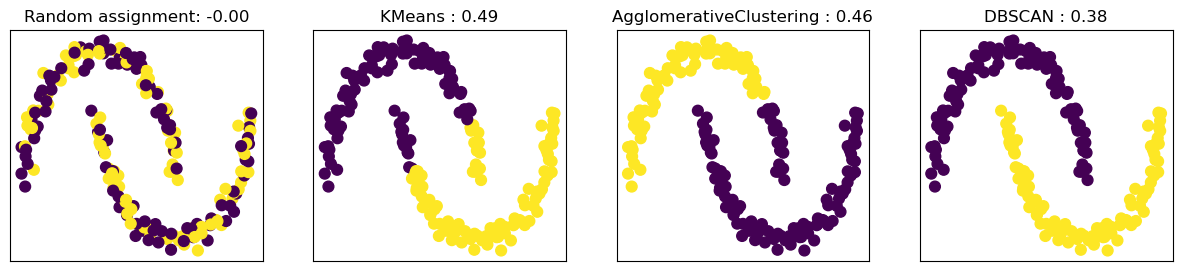

In [31]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))